In [4]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
communities_and_crime_unnormalized = fetch_ucirepo(id=211) 
  
# data (as pandas dataframes) 
X = communities_and_crime_unnormalized.data.features 
y = communities_and_crime_unnormalized.data.targets 
print(y.shape)
  
# metadata 
print(communities_and_crime_unnormalized.metadata) 
  
# variable information 
print(communities_and_crime_unnormalized.variables) 


(2215, 18)
{'uci_id': 211, 'name': 'Communities and Crime Unnormalized', 'repository_url': 'https://archive.ics.uci.edu/dataset/211/communities+and+crime+unnormalized', 'data_url': 'https://archive.ics.uci.edu/static/public/211/data.csv', 'abstract': "Communities in the US. Data combines socio-economic data from the '90 Census, law enforcement data from the 1990 Law Enforcement Management and Admin Stats survey, and crime data from the 1995 FBI UCR", 'area': 'Social Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 2215, 'num_features': 125, 'feature_types': ['Real'], 'demographics': ['Race', 'Age', 'Income', 'Education Level', 'Other', 'Occupation'], 'target_col': ['murders', 'murdPerPop', 'rapes', 'rapesPerPop', 'robberies', 'robbbPerPop', 'assaults', 'assaultPerPop', 'burglaries', 'burglPerPop', 'larcenies', 'larcPerPop', 'autoTheft', 'autoTheftPerPop', 'arsons', 'arsonsPerPop', 'violentPerPop', 'nonViolPerPop'], 'index_col': ['communityname', 

In [15]:
print(X.shape)
print(y.shape)

(2215, 125)
(2215, 18)


In [12]:
print(y.head(5))

   murders  murdPerPop  rapes  rapesPerPop  robberies  robbbPerPop  assaults  \
0        0         0.0    0.0         0.00        1.0         8.20       4.0   
1        0         0.0    1.0         4.25        5.0        21.26      24.0   
2        3         8.3    6.0        16.60       56.0       154.95      14.0   
3        0         0.0   10.0        57.86       10.0        57.86      33.0   
4        0         0.0    NaN          NaN        4.0        32.04      14.0   

   assaultPerPop  burglaries  burglPerPop  larcenies  larcPerPop  autoTheft  \
0          32.81        14.0       114.85      138.0     1132.08       16.0   
1         102.05        57.0       242.37      376.0     1598.78       26.0   
2          38.74       274.0       758.14     1797.0     4972.19      136.0   
3         190.93       225.0      1301.78      716.0     4142.56       47.0   
4         112.14        91.0       728.93     1060.0     8490.87       91.0   

   autoTheftPerPop  arsons  arsonsPerPop  vi

In [32]:
print(X.columns[::-1])

lemas_cols = [c for c in X.columns if str(c).lower().startswith("lemas")]
print(lemas_cols)

print(X["pctOfficDrugUnit"])
print(X["gangUnit"] != None)

Index(['policBudgetPerPop', 'pctOfficDrugUnit', 'gangUnit', 'pctPolicPatrol',
       'policOperBudget', 'policCarsAvail', 'pctUsePubTrans', 'popDensity',
       'landArea', 'policAveOT',
       ...
       'pct16-24', 'pct12-29', 'pct12-21', 'pctHisp', 'pctAsian', 'pctWhite',
       'pctBlack', 'perHoush', 'pop', 'State'],
      dtype='object', length=125)
[]
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2210    0.0
2211    0.0
2212    0.0
2213    0.0
2214    0.0
Name: pctOfficDrugUnit, Length: 2215, dtype: float64
0       True
1       True
2       True
3       True
4       True
        ... 
2210    True
2211    True
2212    True
2213    True
2214    True
Name: gangUnit, Length: 2215, dtype: bool


In [ ]:
target_variable = y["violentPerPop"]
print(target_variable)

0        41.02
1       127.56
2       218.59
3       306.64
4          NaN
         ...  
2210    545.75
2211    124.10
2212    353.83
2213    691.17
2214    918.89
Name: violentPerPop, Length: 2215, dtype: float64
0        41.02
1       127.56
2       218.59
3       306.64
4          NaN
         ...  
2210    545.75
2211    124.10
2212    353.83
2213    691.17
2214    918.89
Name: violentPerPop, Length: 2215, dtype: float64


In [20]:
import pandas as pd

missing_cnt = X.isna().sum()  
missing_pct = (X.isna().mean() * 100).round(2)

miss_table = pd.DataFrame(
    {"missing_count": missing_cnt,
     "missing_pct": missing_pct,
     "non-missing-count": X.shape[0] - missing_cnt,
     "dype": X.dtypes}
).sort_values("missing_pct", ascending=False)


miss_table_nonzero = miss_table[miss_table["missing_count"] > 0]
print(miss_table_nonzero.shape)
print(miss_table_nonzero)

(23, 4)
                   missing_count  missing_pct  non-missing-count     dype
policBudgetPerPop           1872        84.51                343  float64
pctPolicAsian               1872        84.51                343  float64
numPolice                   1872        84.51                343  float64
policePerPop                1872        84.51                343  float64
policeField                 1872        84.51                343  float64
policeFieldPerPop           1872        84.51                343  float64
policeCalls                 1872        84.51                343  float64
policCallPerOffic           1872        84.51                343  float64
policePerPop2               1872        84.51                343  float64
racialMatch                 1872        84.51                343  float64
pctPolicWhite               1872        84.51                343  float64
pctPolicBlack               1872        84.51                343  float64
pctPolicHisp                18

In [44]:
print(X.head(5))

  State    pop  perHoush  pctBlack  pctWhite  pctAsian  pctHisp  pct12-21  \
0    NJ  11980      3.10      1.37     91.78      6.50     1.88     12.47   
1    PA  23123      2.82      0.80     95.57      3.44     0.85     11.01   
2    OR  29344      2.43      0.74     94.33      3.43     2.35     11.36   
3    NY  16656      2.40      1.70     97.35      0.50     0.70     12.55   
4    MN  11245      2.76      0.53     89.16      1.17     0.52     24.46   

   pct12-29  pct16-24  ...  policAveOT  landArea  popDensity  pctUsePubTrans  \
0     21.44     10.93  ...         NaN       6.5      1845.9            9.63   
1     21.30     10.48  ...         NaN      10.6      2186.7            3.84   
2     25.88     11.01  ...         NaN      10.6      2780.9            4.37   
3     25.20     12.19  ...         NaN       5.2      3217.7            3.31   
4     40.53     28.69  ...         NaN      11.5       974.2            0.38   

   policCarsAvail  policOperBudget  pctPolicPatrol  gang

In [34]:
print(X.loc[X["gangUnit"].notna(), "gangUnit"])

9       10.0
13      10.0
17       5.0
19      10.0
21       5.0
        ... 
2185    10.0
2194     5.0
2196    10.0
2200     0.0
2207     0.0
Name: gangUnit, Length: 343, dtype: float64


In [46]:
print(X['State'].unique())
print(X['State'].nunique())

['NJ' 'PA' 'OR' 'NY' 'MN' 'MO' 'MA' 'IN' 'ND' 'TX' 'CA' 'KY' 'AR' 'CT'
 'OH' 'NH' 'FL' 'WA' 'LA' 'ME' 'WY' 'NC' 'MS' 'MI' 'VA' 'SC' 'IL' 'WI'
 'TN' 'UT' 'OK' 'AZ' 'CO' 'GA' 'WV' 'RI' 'AL' 'SD' 'ID' 'NV' 'KS' 'IA'
 'MD' 'NM' 'DE' 'VT' 'AK' 'DC']
48


In [47]:
region_map = {
    'CT':'Northeast','ME':'Northeast','MA':'Northeast','NH':'Northeast',
    'RI':'Northeast','VT':'Northeast','NJ':'Northeast','NY':'Northeast','PA':'Northeast',

    'IL':'Midwest','IN':'Midwest','MI':'Midwest','OH':'Midwest','WI':'Midwest',
    'IA':'Midwest','KS':'Midwest','MN':'Midwest','MO':'Midwest','NE':'Midwest',
    'ND':'Midwest','SD':'Midwest',

    'DE':'South','FL':'South','GA':'South','MD':'South','NC':'South','SC':'South',
    'VA':'South','DC':'South','WV':'South',
    'AL':'South','KY':'South','MS':'South','TN':'South',
    'AR':'South','LA':'South','OK':'South','TX':'South',

    'AZ':'West','CO':'West','ID':'West','MT':'West','NV':'West','NM':'West',
    'UT':'West','WY':'West','AK':'West','CA':'West','HI':'West','OR':'West','WA':'West'
}
X['Region'] = X['State'].map(region_map)

/var/folders/rp/xg3cw1914_d4gd0d9hh6jmh80000gn/T/ipykernel_39646/189549344.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Region'] = X['State'].map(region_map)


In [49]:
print(X['Region'])
print(list(X.columns))

0       Northeast
1       Northeast
2            West
3       Northeast
4         Midwest
          ...    
2210         West
2211        South
2212         West
2213        South
2214         West
Name: Region, Length: 2215, dtype: object
['State', 'pop', 'perHoush', 'pctBlack', 'pctWhite', 'pctAsian', 'pctHisp', 'pct12-21', 'pct12-29', 'pct16-24', 'pct65up', 'persUrban', 'pctUrban', 'medIncome', 'pctWwage', 'pctWfarm', 'pctWdiv', 'pctWsocsec', 'pctPubAsst', 'pctRetire', 'medFamIncome', 'perCapInc', 'whitePerCap', 'blackPerCap', 'NAperCap', 'asianPerCap', 'otherPerCap', 'hispPerCap', 'persPoverty', 'pctPoverty', 'pctLowEdu', 'pctNotHSgrad', 'pctCollGrad', 'pctUnemploy', 'pctEmploy', 'pctEmployMfg', 'pctEmployProfServ', 'pctOccupManu', 'pctOccupMgmt', 'pctMaleDivorc', 'pctMaleNevMar', 'pctFemDivorc', 'pctAllDivorc', 'persPerFam', 'pct2Par', 'pctKids2Par', 'pctKids-4w2Par', 'pct12-17w2Par', 'pctWorkMom-6', 'pctWorkMom-18', 'kidsBornNevrMarr', 'pctKidsBornNevrMarr', 'numForeignBorn', 'pc

In [51]:
import numpy as np

           count  percentage
Region                      
South        631       28.49
Northeast    620       27.99
Midwest      513       23.16
West         451       20.36


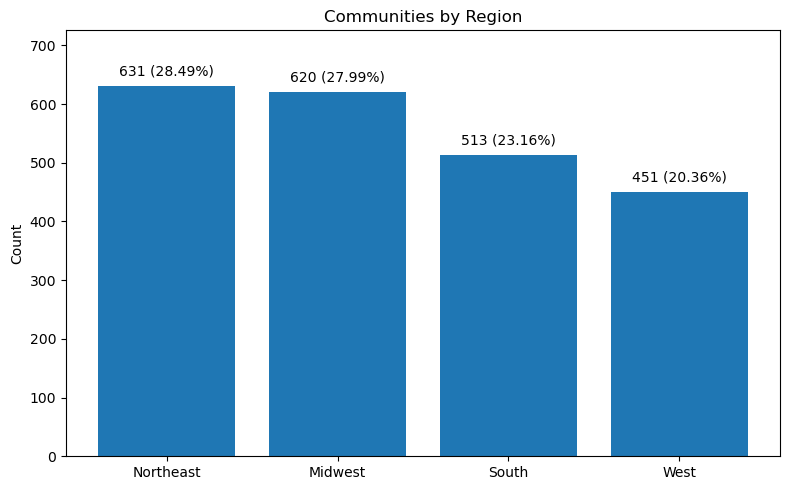

In [50]:
import matplotlib.pyplot as plt

reg_counts = X['Region'].value_counts(dropna = False)
reg_pct = (X['Region'].value_counts(normalize=True, dropna=False)*100).round(2)
reg_table = pd.DataFrame({"count": reg_counts, "percentage":reg_pct})
print(reg_table)

order = ['Northeast', 'Midwest', 'South', 'West']
plt.figure(figsize=(8,5))
bars = plt.bar(order, reg_counts.values)
plt.ylabel("Count")
plt.title("Communities by Region")
plt.ylim(0, max(reg_counts.values)*1.15)
plt.tight_layout()

for bar, cnt, pct in zip(bars, reg_counts.values, reg_pct.values):
    x = bar.get_x() + bar.get_width()/2
    y = bar.get_height()
    label = f"{int(cnt)} ({pct:.2f}%)"
    plt.text(x, y + max(reg_counts.values)*0.02, label,
             ha="center", va="bottom", fontsize=10)
plt.show()

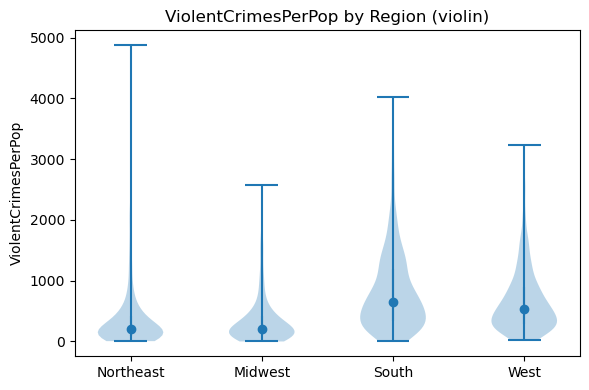

In [54]:
df = pd.DataFrame({"Region": X["Region"], "violentPerPop": target_variable})
df = df.dropna(subset=["Region", "violentPerPop"]).copy()

groups = [df.loc[df["Region"]==r, "violentPerPop"].values for r in order]
plt.figure(figsize=(6,4))
parts = plt.violinplot(
    groups,
    showmeans=False,
    showmedians=False,
    showextrema=True
)
pos = np.arange(1, len(groups)+1)
med = [np.median(g) for g in groups]
q1  = [np.percentile(g, 25) for g in groups]
q3  = [np.percentile(g, 75) for g in groups]

plt.scatter(pos, med, marker="o")
for x, lo, hi in zip(pos, q1, q3):
    plt.vlines(x, lo, hi)

plt.xticks(pos, order)
plt.ylabel("ViolentCrimesPerPop")
plt.title("ViolentCrimesPerPop by Region (violin)")
plt.tight_layout()
plt.show()



In [63]:
pd.set_option('display.max_rows', None)
display(pd.DataFrame({'column': X.columns}))




,column
0,State
1,pop
2,perHoush
3,pctBlack
4,pctWhite
5,pctAsian
6,pctHisp
7,pct12-21
8,pct12-29
9,pct16-24


In [69]:
socio_cols = [
    "medIncome","perCapInc","pctWwage","pctPubAsst","pctWsocsec",
    "pctNotHSgrad","pctCollGrad","pctUnemploy",
    "pct2Par","pct12-17w2Par","persPerFam",  
    "pctUrban","popDensity",
    "pctBlack","pctHisp","pctForeignBorn","pctNotSpeakEng","pctAsian"
    "pctSameHouse-5"
]
cols = [c for c in socio_cols if c in X.columns]  
print(cols)

['medIncome', 'perCapInc', 'pctWwage', 'pctPubAsst', 'pctWsocsec', 'pctNotHSgrad', 'pctCollGrad', 'pctUnemploy', 'pct2Par', 'pct12-17w2Par', 'persPerFam', 'pctUrban', 'popDensity', 'pctBlack', 'pctHisp', 'pctForeignBorn', 'pctNotSpeakEng']


In [68]:
print(X.columns[[13,14,17,18,21,31,33,32,44,47,43,12,118,3,5,6,94,62,96]])

Index(['medIncome', 'pctWwage', 'pctWsocsec', 'pctPubAsst', 'perCapInc',
       'pctNotHSgrad', 'pctUnemploy', 'pctCollGrad', 'pct2Par',
       'pct12-17w2Par', 'persPerFam', 'pctUrban', 'pctUsePubTrans', 'pctBlack',
       'pctAsian', 'pctHisp', 'pctForeignBorn', 'pctNotSpeakEng',
       'pctSameHouse-5'],
      dtype='object')


In [73]:
print(X.columns[[100,124,104,100,113,114,109,110,111,112,118,117]])

Index(['policePerPop', 'policBudgetPerPop', 'policCallPerPop', 'policePerPop',
       'officDrugUnits', 'numDiffDrugsSeiz', 'pctPolicBlack', 'pctPolicHisp',
       'pctPolicAsian', 'pctPolicMinority', 'pctUsePubTrans', 'popDensity'],
      dtype='object')


In [75]:
police_cols = ['policePerPop', 'policBudgetPerPop', 'policCallPerPop', 'policePerPop',
       'officDrugUnits', 'numDiffDrugsSeiz', 'pctPolicBlack', 'pctPolicHisp',
       'pctPolicAsian', 'pctPolicMinority', 'pctUsePubTrans', 'popDensity']

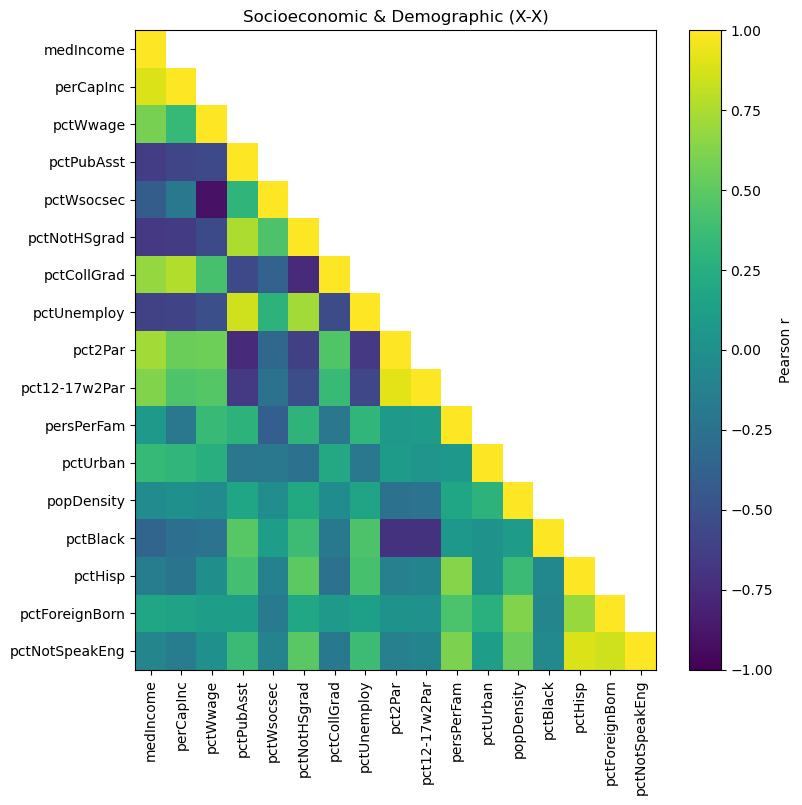

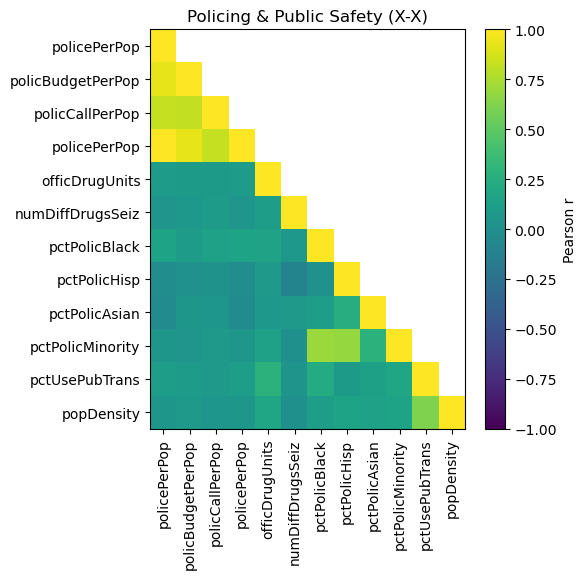

In [76]:
def corr_heatmap(df, cols, title):
    cols = [c for c in cols if c in df.columns]            
    Xsub = df[cols].copy()
    Xsub = Xsub.fillna(Xsub.median())                      
    C = Xsub.corr().values

    mask = np.triu(np.ones_like(C, dtype=bool), k=1)
    C_masked = np.ma.array(C, mask=mask)

    fig, ax = plt.subplots(figsize=(0.5+0.45*len(cols), 0.5+0.45*len(cols)))
    im = ax.imshow(C_masked, vmin=-1, vmax=1, aspect="auto")
    ax.set_xticks(range(len(cols)))
    ax.set_yticks(range(len(cols)))
    ax.set_xticklabels(cols, rotation=90)
    ax.set_yticklabels(cols)
    fig.colorbar(im, ax=ax, label="Pearson r")
    ax.set_title(title)
    plt.tight_layout()
    plt.show()
corr_heatmap(X, socio_cols,  "Socioeconomic & Demographic (X-X)")
corr_heatmap(X, police_cols, "Policing & Public Safety (X-X)")


                feature       rho   abs_rho
0           pctKids2Par -0.762885  0.762885
1   pctKidsBornNevrMarr  0.742949  0.742949
2      kidsBornNevrMarr  0.730817  0.730817
3               pct2Par -0.722743  0.722743
4              pctWhite -0.697891  0.697891
5        pctKids-4w2Par -0.685208  0.685208
6           persPoverty  0.671740  0.671740
7         pct12-17w2Par -0.661999  0.661999
8               pctWdiv -0.657957  0.657957
9       pctPopDenseHous  0.649412  0.649412
10         pctFemDivorc  0.643978  0.643978
11         pctAllDivorc  0.633232  0.633232
12           pctPubAsst  0.625758  0.625758
13           pctPoverty  0.618624  0.618624
14             pctBlack  0.604640  0.604640
15      pctPersOwnOccup -0.596308  0.596308
16        pctMaleDivorc  0.594246  0.594246
17       pctHousWOphone  0.585011  0.585011
18          pctUnemploy  0.547460  0.547460
19    pctSmallHousUnits  0.538207  0.538207


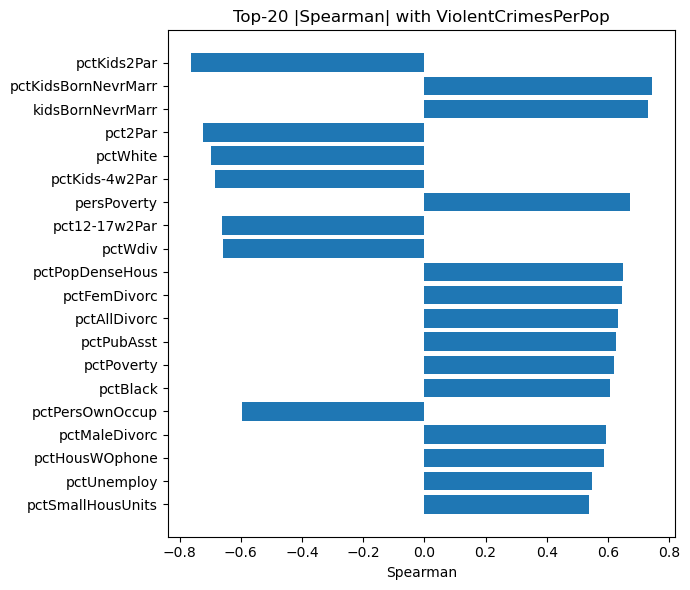

In [ ]:

from scipy.stats import spearmanr


num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
Xn = X[num_cols].copy()

Xn_imp = Xn.fillna(Xn.median())

spearman_vals = []
for col in Xn_imp.columns:
    if Xn_imp[col].nunique(dropna=True) <= 1:
        continue
    rho, _ = spearmanr(Xn_imp[col], target_variable, nan_policy="omit")
    spearman_vals.append((col, rho, abs(rho)))

rank_df = (pd.DataFrame(spearman_vals, columns=["feature","rho","abs_rho"])
             .sort_values("abs_rho", ascending=False)
             .reset_index(drop=True))

top20 = rank_df.head(20)
print(top20)



plt.figure(figsize=(7, 6))
ypos = np.arange(len(top20))
plt.barh(ypos, top20["rho"].values) 
plt.yticks(ypos, top20["feature"].values)
plt.gca().invert_yaxis()  
plt.xlabel("Spearman")
plt.title("Top-20 |Spearman| with ViolentCrimesPerPop")
plt.tight_layout()
plt.show()




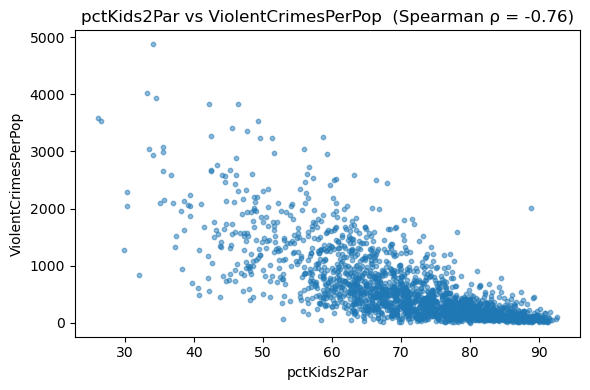

In [92]:
x_pctkids2par = X["pctKids2Par"].to_numpy(dtype=float)
y_pctkids2par = target_variable.to_numpy(dtype=float)
m = ~np.isnan(x_pctkids2par) & ~np.isnan(y_pctkids2par)

rho, _ = spearmanr(x_pctkids2par[m], y_pctkids2par[m])

plt.figure(figsize=(6,4))
plt.scatter(x_pctkids2par[m], y_pctkids2par[m], s=10, alpha=0.5)
plt.xlabel("pctKids2Par")
plt.ylabel("ViolentCrimesPerPop")
plt.title(f"pctKids2Par vs ViolentCrimesPerPop  (Spearman ρ = {rho:.2f})")
plt.tight_layout()
plt.show()

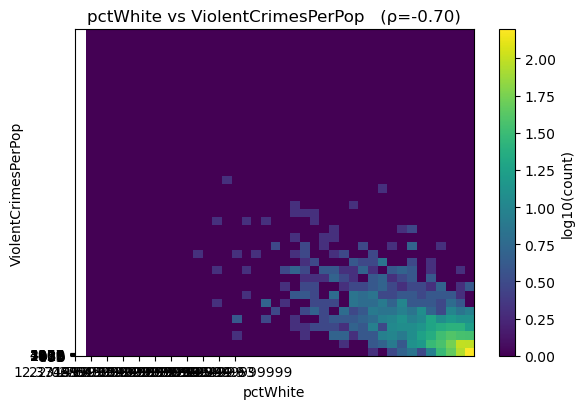

In [95]:
x_pctwhite = X["pctWhite"].astype(float).to_numpy()
y_pctwhite = target_variable.astype(float).to_numpy()

m = ~np.isnan(x_pctwhite) & ~np.isnan(y_pctwhite)
x_pctwhite, y_pctwhite = x_pctwhite[m], y_pctwhite[m]
to_percent = np.nanmax(x_pctwhite) <= 1.0 + 1e-9
x_topct = x_pctwhite * (100.0 if to_percent else 1.0)
xlabel = "pctWhite (%)" if to_percent else "pctWhite"

nbins = 40
heatmap, xedges, yedges = np.histogram2d(x_topct, y_pctwhite, bins=nbins)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
heatmap[heatmap == 0] = 0.1

plt.figure(figsize=(6, 4.2))
plt.imshow(np.log10(heatmap).T, origin='lower', extent=extent, aspect='auto', vmin=0)
plt.xlabel(xlabel)
plt.ylabel('ViolentCrimesPerPop')

plt.xticks(np.arange(nbins+1)[::4], xedges[::4].astype(int if to_percent else float))
plt.yticks(np.arange(nbins+1)[::4], yedges[::4].astype(int))

plt.colorbar(label='log10(count)')

# Spearman for the title
rho, _ = spearmanr(x_topct, y_pctwhite)
plt.title(f'{xlabel} vs ViolentCrimesPerPop   (ρ={rho:.2f})')

plt.tight_layout()
plt.show()


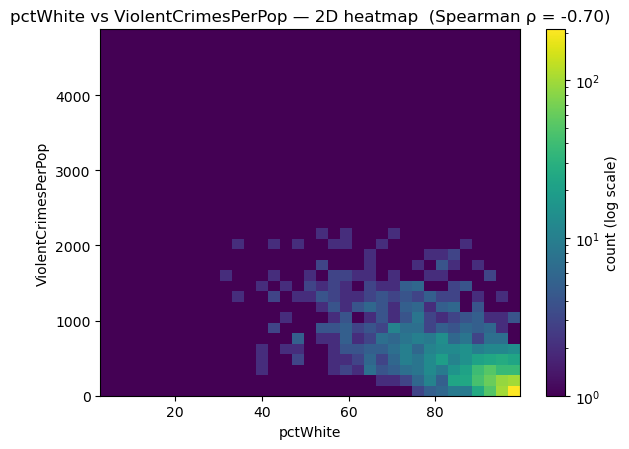

In [ ]:
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.ticker import MaxNLocator, PercentFormatter

bins = 35  

H, xedges, yedges = np.histogram2d(x_topct, y_pctwhite, bins=bins)  
H = H.T
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.figure(figsize=(6.2, 4.6))


img = plt.imshow(
    H,
    origin="lower",
    extent=extent,
    aspect="auto",
    norm=mcolors.LogNorm(vmin=1, clip=True)
)
cbar = plt.colorbar(img)
cbar.set_label("count (log scale)")

plt.xlabel(xlabel)
plt.ylabel("ViolentCrimesPerPop")
plt.title(f"{xlabel} vs ViolentCrimesPerPop — 2D heatmap  (Spearman ρ = {rho:.2f})")


ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(nbins=6))
ax.yaxis.set_major_locator(MaxNLocator(nbins=6))

if np.nanmax(x_topct) <= 1.0 + 1e-9:
    ax.xaxis.set_major_formatter(PercentFormatter(xmax=1.0))

plt.tight_layout()
plt.show()


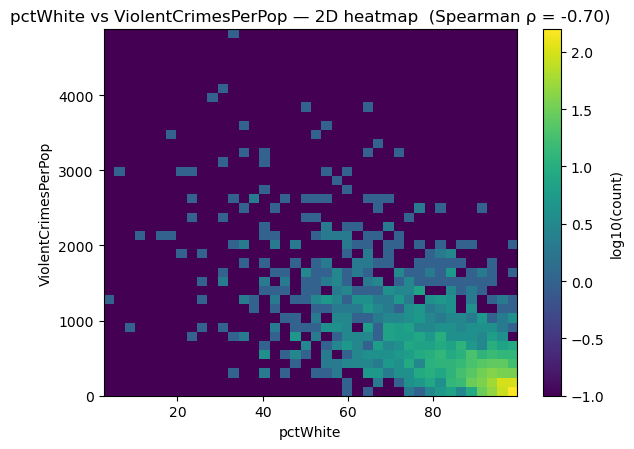

In [107]:
x_pctwhite = X["pctWhite"].astype(float).to_numpy()
y_pctwhite = target_variable.astype(float).to_numpy()

m = ~np.isnan(x_pctwhite) & ~np.isnan(y_pctwhite)
x_pctwhite, y_pctwhite = x_pctwhite[m], y_pctwhite[m]
to_percent = np.nanmax(x_pctwhite) <= 1.0 + 1e-9
x_topct = x_pctwhite * (100.0 if to_percent else 1.0)
xlabel = "pctWhite (%)" if to_percent else "pctWhite"


bins = 40
H, xedges, yedges = np.histogram2d(x_topct, y_pctwhite, bins=bins)
H = H.T
Hf = H.astype(float)
Hf[Hf == 0] = 0.1
H_plot = np.log10(Hf)

rho, _ = spearmanr(x_pctwhite, y_pctwhite)

plt.figure(figsize=(6.2, 4.6))
img = plt.imshow(
    H_plot,
    origin="lower",
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    aspect="auto"
)
cbar = plt.colorbar(img)
cbar.set_label("log10(count)")

plt.xlabel(xlabel)
plt.ylabel("ViolentCrimesPerPop")
plt.title(f"{xlabel} vs ViolentCrimesPerPop — 2D heatmap  (Spearman ρ = {rho:.2f})")

plt.tight_layout()
plt.show()

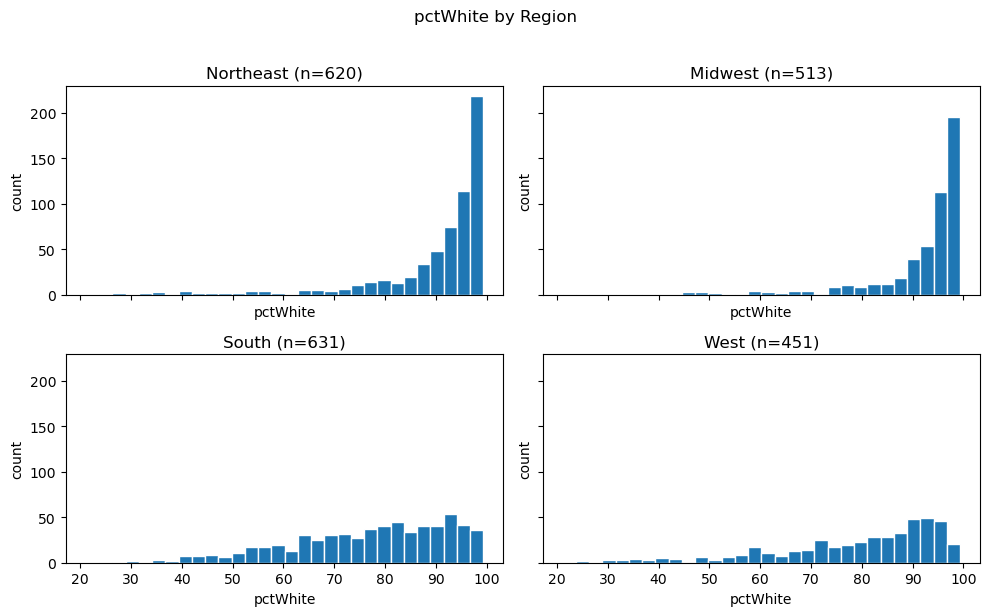

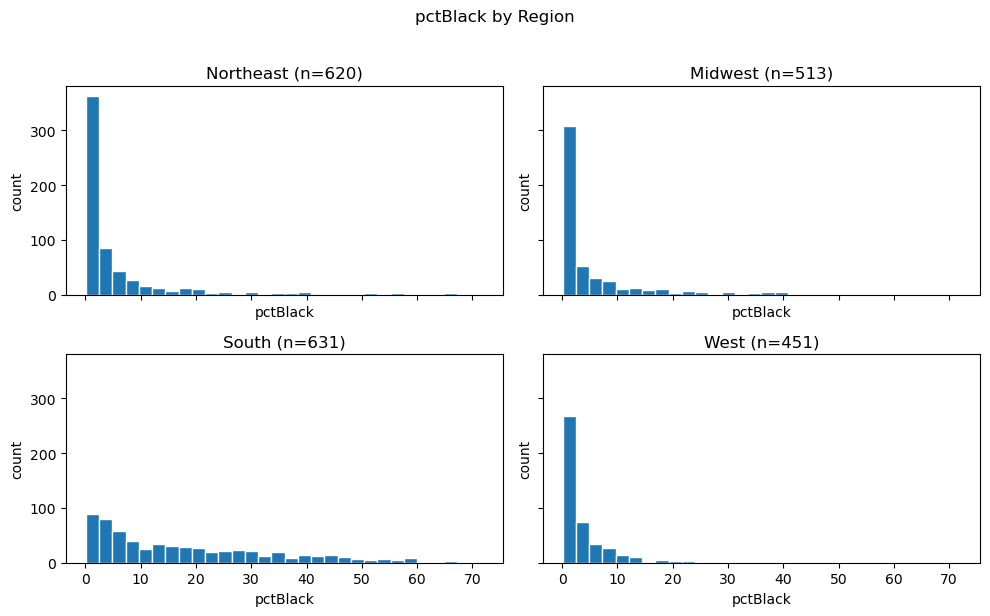

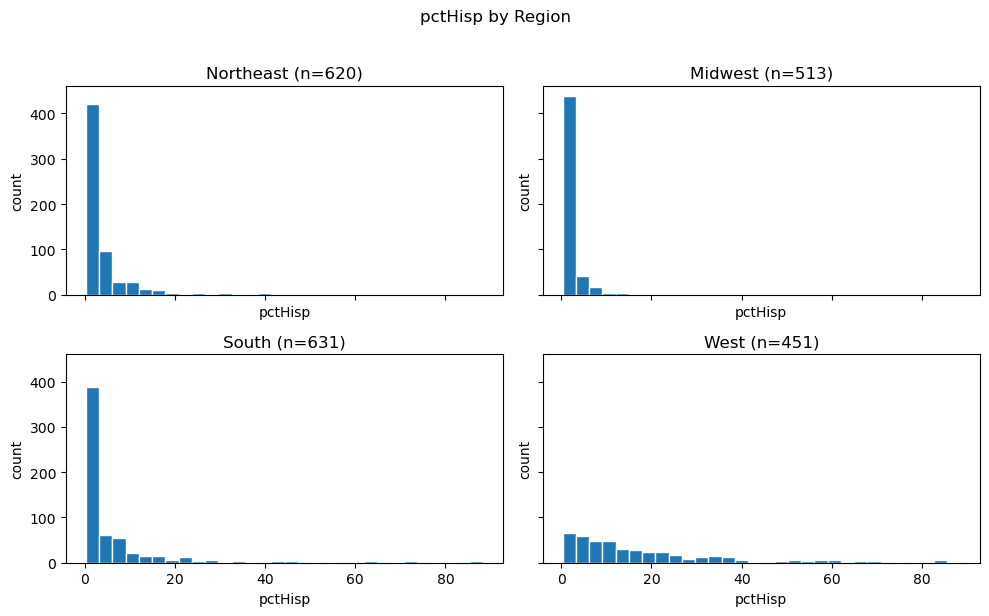

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def facet_hist_by_region(df, col, regions=("Northeast","Midwest","South","West"),
                         bins=30, to_percent=True):
    
    x_all = df[col].astype(float)
    # auto-detect: if values look like 0–1 proportions, convert to %
    scale = 100.0 if (to_percent and np.nanmax(x_all.values) <= 1.0 + 1e-9) else 1.0
    label = f"{col} (%)" if scale == 100.0 else col

    fig, axes = plt.subplots(2, 2, figsize=(10, 6), sharex=True, sharey=True)
    axes = axes.ravel()

    # compute a common x-range across regions for fair comparison
    vals = x_all.to_numpy()
    lo = np.nanpercentile(vals, 0.5)
    hi = np.nanpercentile(vals, 99.5)
    # if all values identical (edge case)
    if not np.isfinite(lo) or not np.isfinite(hi) or lo == hi:
        lo, hi = np.nanmin(vals), np.nanmax(vals)

    for ax, r in zip(axes, regions):
        xr = df.loc[df["Region"]==r, col].astype(float).to_numpy()
        xr = xr[~np.isnan(xr)] * scale
        ax.hist(xr, bins=bins, range=(lo*scale, hi*scale), edgecolor="white")
        ax.set_title(f"{r} (n={xr.size})")
        ax.set_xlabel(label)
        ax.set_ylabel("count")

    fig.suptitle(f"{col} by Region", y=1.02, fontsize=12)
    plt.tight_layout()

    
    plt.show()


facet_hist_by_region(X, "pctWhite")
facet_hist_by_region(X, "pctBlack")
facet_hist_by_region(X, "pctHisp")


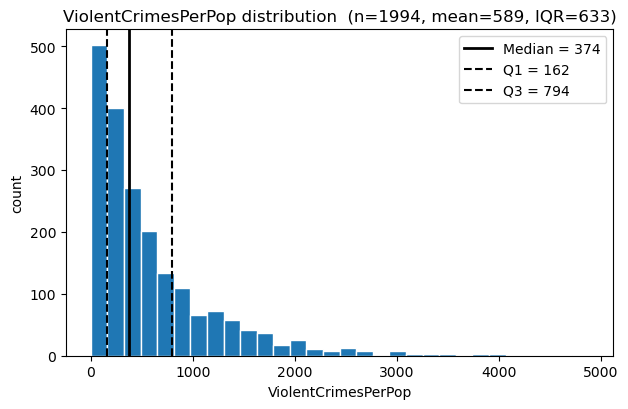

In [115]:
import numpy as np
import matplotlib.pyplot as plt


col = "ViolentCrimesPerPop"
y_distribution = target_variable.astype(float).to_numpy()

y_distribution = y_distribution[~np.isnan(y_distribution)]                     # drop NaNs

# summary stats
n = y_distribution.size
p25, p50, p75 = np.percentile(y_distribution, [25, 50, 75])
iqr = p75 - p25
mean = y_distribution.mean()

# histogram
plt.figure(figsize=(6.4, 4.2))
plt.hist(y_distribution, bins=30, edgecolor="white")
plt.axvline(p50, color="k", linewidth=2, label=f"Median = {p50:.0f}")
plt.axvline(p25, color="k", linestyle="--", label=f"Q1 = {p25:.0f}")
plt.axvline(p75, color="k", linestyle="--", label=f"Q3 = {p75:.0f}")

plt.xlabel(col)
plt.ylabel("count")
plt.title(f"{col} distribution  (n={n}, mean={mean:.0f}, IQR={iqr:.0f})")
plt.legend()
plt.tight_layout()
plt.show()


In [90]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [112]:
X = X.drop(columns=["State"], errors="ignore")

onehot_ftrs = ['Region']
ordinal_ftrs = ['gangUnit']
ordinal_cats = [[0,5,10]]
exclude = set(ordinal_ftrs + onehot_ftrs)
std_ftrs = [c for c in X.columns if c not in exclude]

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = ordinal_cats, handle_unknown='use_encoded_value', unknown_value=-1, encoded_missing_value= np.nan), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)])

prep = Pipeline(steps=[('preprocessor', preprocessor)])



In [113]:
random_state = 42
X_other, X_test, y_other, y_test = train_test_split(X, target_variable, test_size=0.2, random_state=random_state)

kf = KFold(n_splits=5, shuffle=True, random_state=random_state)
for fold_id, (train_index, val_index) in enumerate(kf.split(X_other, y_other), start=1):
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]

    prep.fit(X_train, y_train)
    feat_names = prep.get_feature_names_out()

    X_train_proc = prep.transform(X_train)
    X_val_proc   = prep.transform(X_val)

    X_train_df = pd.DataFrame(X_train_proc, columns=feat_names, index=X_train.index)
    X_val_df   = pd.DataFrame(X_val_proc,   columns=feat_names, index=X_val.index)

    print(f"[Fold {fold_id}] train {X_train.shape} to {X_train_df.shape} | "
          f"valid {X_val.shape} to {X_val_df.shape}")
    
    

[Fold 1] train (1417, 125) to (1417, 128) | valid (355, 125) to (355, 128)
[Fold 2] train (1417, 125) to (1417, 128) | valid (355, 125) to (355, 128)
[Fold 3] train (1418, 125) to (1418, 128) | valid (354, 125) to (354, 128)
[Fold 4] train (1418, 125) to (1418, 128) | valid (354, 125) to (354, 128)
[Fold 5] train (1418, 125) to (1418, 128) | valid (354, 125) to (354, 128)


In [116]:
print(X_test.shape)

(443, 125)


In [ ]:
onehot_ftrs = ['Region']
onehot = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

onehot.fit(X_train[onehot_ftrs])

onehot_train = onehot.transform(X_train[onehot_ftrs])
onehot_val = onehot.transform(X_val[onehot_ftrs])
onehot_test = onehot.transform(X_test[onehot_ftrs])

In [ ]:
ordinal_ftrs = ['gangUnit']
ordinal_cats = [[0,5,10,None]]

ord = OrdinalEncoder(categories=ordinal_cats)
ord.fit(X_train[ordinal_ftrs])

ordinal_train = ord.transform(X_train[onehot_ftrs])
ordinal_val = ord.transform(X_val[onehot_ftrs])
ordinal_test = ord.transform(X_test[ordinal_ftrs])


In [ ]:
exclude = {"state", "Region", "gangunit"}  
std_ftrs = [c for c in X.columns if c not in exclude]

scaler = StandardScaler()

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder(categories= [[0, 5, 10]], handle_unknown= "use_encoded_value", unknown_value= -1)

enc.fit(X[['gangUnit']])
X_ord = enc.transform(X[['gangUnit']])
